In [1]:
%matplotlib notebook
from scipy import ndimage
from scipy import misc
import imageio
import numpy as np
import matplotlib.pyplot as plt
import copy
import astropy
from astropy.io import fits

In [2]:
bias1= astropy.io.fits.open('bias/Bias1.fit')
bias2= astropy.io.fits.open('bias/Bias2.fit')
bias3= astropy.io.fits.open('bias/Bias3.fit')

In [3]:
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data]), axis=0)

In [4]:
bias1= None
bias2= None
bias3= None

In [5]:
dark1= astropy.io.fits.open('darks/Dark1.fit')
dark2= astropy.io.fits.open('darks/Dark2.fit')
dark3= astropy.io.fits.open('darks/Dark3.fit')

In [6]:
darklist= np.array([dark1[0].data, dark2[0].data, dark3[0].data]) - master_bias

In [7]:
dark1 = None
dark2 = None
dark3 = None
master_bias=None

In [8]:
master_dark= np.median(darklist, axis=0)

In [9]:
darklist=None

In [10]:
bias1= astropy.io.fits.open('bias/Bias1.fit')
bias2= astropy.io.fits.open('bias/Bias2.fit')
bias3= astropy.io.fits.open('bias/Bias3.fit')

In [11]:
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data]), axis=0)

In [12]:
bias1= None
bias2= None
bias3= None

In [13]:
darkybias= master_dark + master_bias

In [14]:
master_dark=None
master_bias=None

In [15]:
flati1= astropy.io.fits.open('flats/i/Flati1.fit')
flati2= astropy.io.fits.open('flats/i/Flati2.fit')
flati3= astropy.io.fits.open('flats/i/Flati3.fit')

In [16]:
flatilist= np.mean(np.array([flati1[0].data, flati2[0].data, flati3[0].data]), axis=0)

In [17]:
flati1= None
flati2= None
flati3= None

In [18]:
master_flat_i= (flatilist - darkybias)/(np.median(flatilist - darkybias))

In [19]:
i1= astropy.io.fits.open('lights/i1.fit')
i1redux= np.divide(i1[0].data - darkybias, master_flat_i)

In [20]:
i2= astropy.io.fits.open('lights/i2.fit')
i2redux= np.divide(i2[0].data - darkybias, master_flat_i)

In [21]:
i3= astropy.io.fits.open('lights/i3.fit')
i3redux= np.divide(i3[0].data - darkybias, master_flat_i)

In [22]:
flatilist=None
darkybias=None
i1=None
i2=None
i3=None

In [23]:
i1redux.shape

(4096, 4096)

In [24]:
i2redux.shape

(4096, 4096)

In [25]:
i3redux.shape

(4096, 4096)

In [26]:
print(np.mean(master_flat_i))
print(np.std(master_flat_i))

0.9758992949400509
0.1268940889719946


In [27]:
master_flat_i=None

<IPython.core.display.Javascript object>


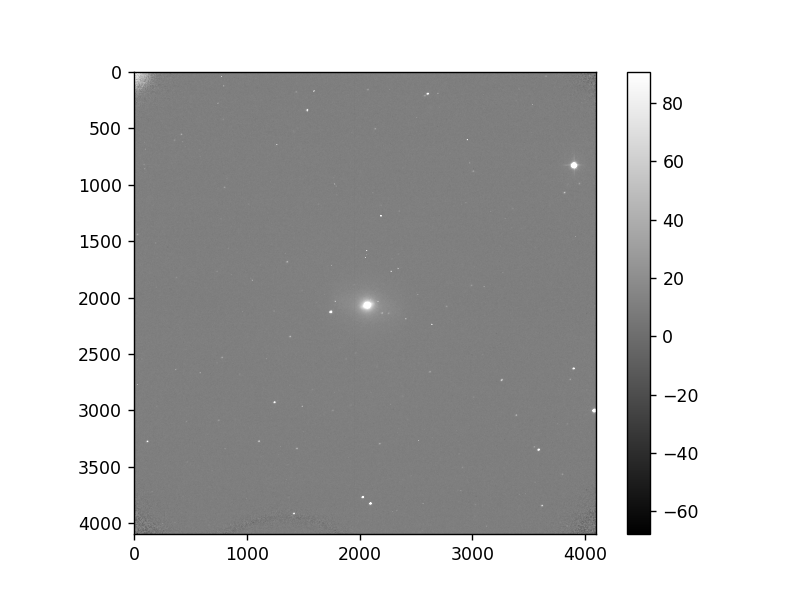

In [28]:
#test= astropy.io.fits.open('')
#data= test[0].data
plt.imshow(i1redux,cmap='gray',vmin=np.mean(i1redux)-np.std(i1redux),vmax=np.mean(i1redux)+np.std(i1redux))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


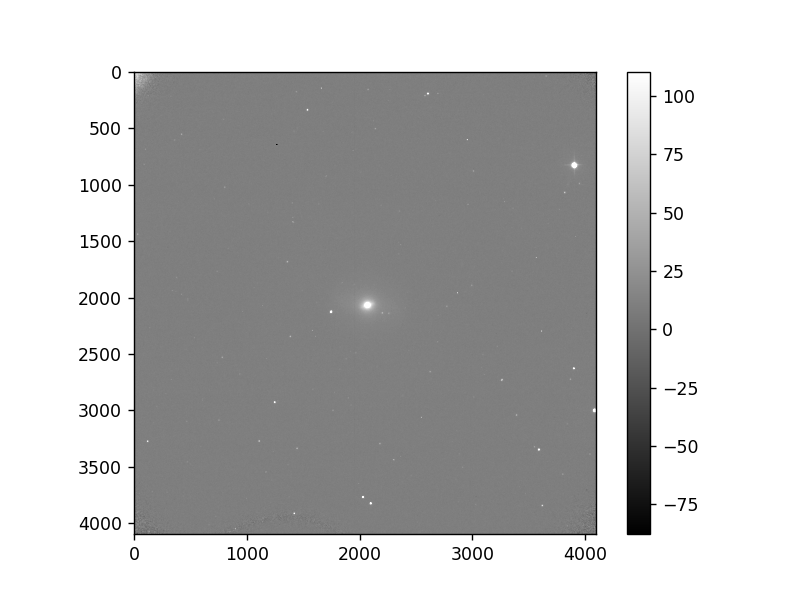

In [29]:
#test= astropy.io.fits.open('')
#data= test[0].data
plt.imshow(i2redux,cmap='gray',vmin=np.mean(i2redux)-np.std(i2redux),vmax=np.mean(i2redux)+np.std(i2redux))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


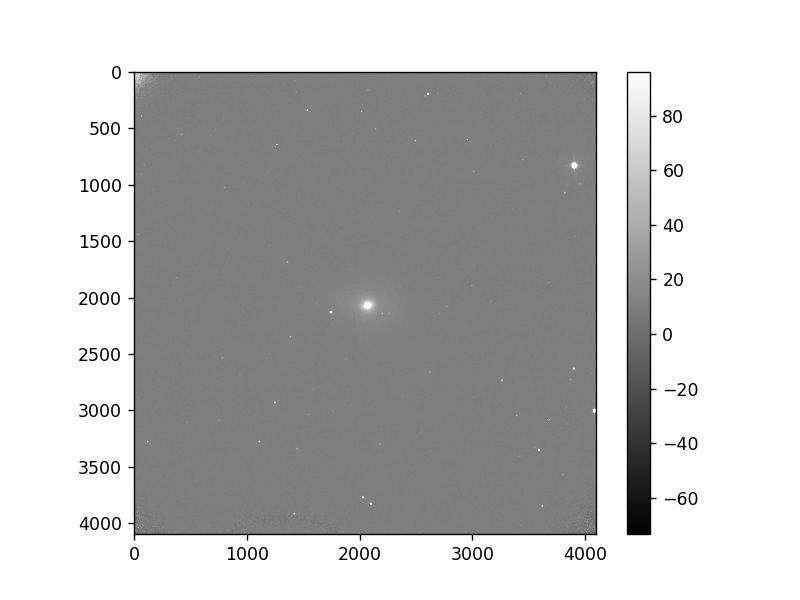

In [30]:
#test= astropy.io.fits.open('')
#data= test[0].data
plt.imshow(i3redux,cmap='gray',vmin=np.mean(i3redux)-np.std(i3redux),vmax=np.mean(i3redux)+np.std(i3redux))
plt.colorbar()
plt.show()